<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [19]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr #person test

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [11]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35 <= Years Old <= 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,> 70 Years Old
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35 <= Years Old <= 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35 <= Years Old <= 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35 <= Years Old <= 70


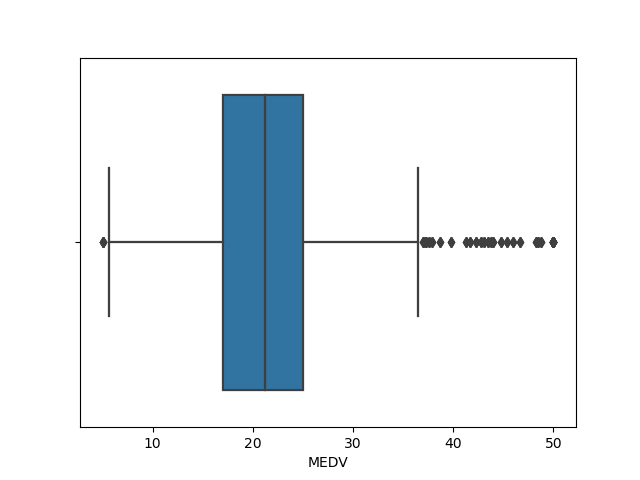

In [7]:
#Task 4: Generate Descriptive Statistics and Visualizations
#For the "Median value of owner-occupied homes" provide a boxplot

sns.boxplot(x=boston_df["MEDV"])
pyplot.show()

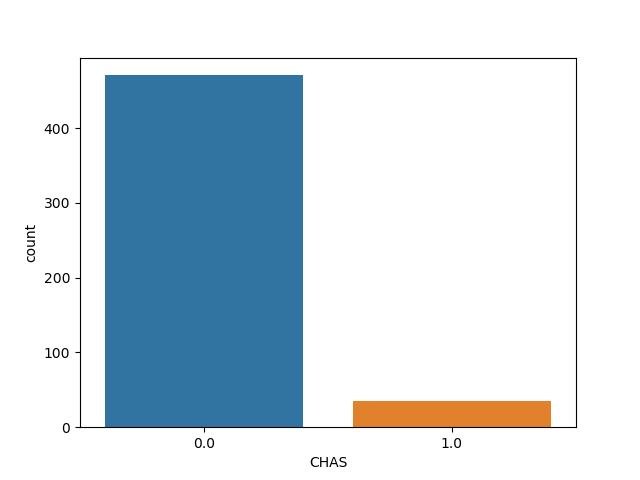

In [8]:
#Task 4: Generate Descriptive Statistics and Visualizations
#Provide a  bar plot for the Charles river variable

sns.countplot(data = boston_df, x = "CHAS")
pyplot.show()

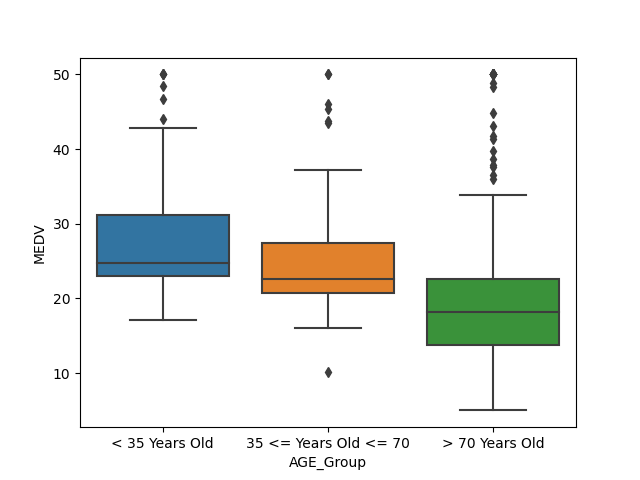

In [10]:
#Task 4: Generate Descriptive Statistics and Visualizations
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df["AGE_Group"] = pd.cut(boston_df["AGE"]
    , bins = [0,35,70,100]
    , labels = ["< 35 Years Old", "35 <= Years Old <= 70", "> 70 Years Old"])

sns.boxplot(x = boston_df["AGE_Group"], y = boston_df["MEDV"])
pyplot.show()

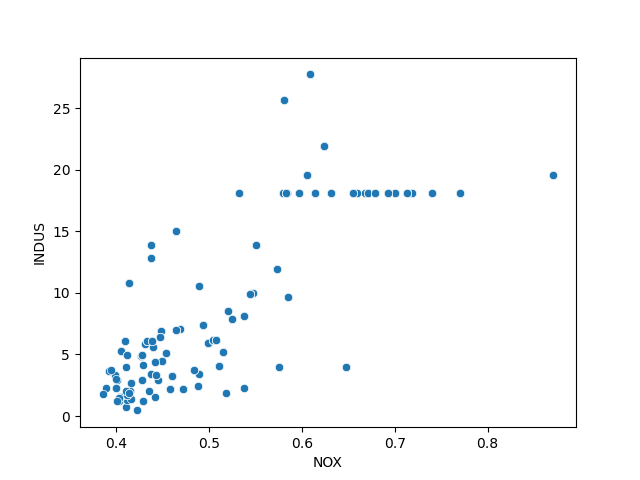

In [12]:
#Task 4: Generate Descriptive Statistics and Visualizations
#Provide a scatter plot to show the relationship between Nitric oxide concentrations 
#and the proportion of non-retail business acres per town. 
#What can you say about the relationship?

sns.scatterplot(data = boston_df, x = "NOX", y = "INDUS")
pyplot.show()

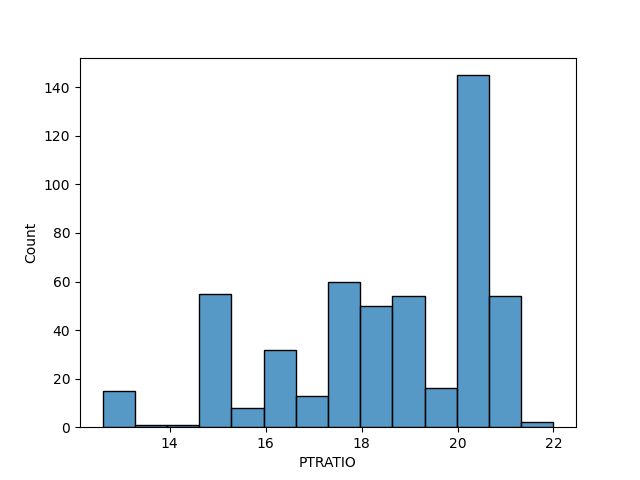

In [13]:
#Task 4: Generate Descriptive Statistics and Visualizations
#Create a histogram for the pupil to teacher ratio variable

sns.histplot(data = boston_df, x = "PTRATIO")
pyplot.show()

In [49]:
#Task 5: Use the appropriate tests to answer the questions provided.
#Is there a significant difference in median value of houses bounded 
#by the Charles river or not? (T-test for independent samples)

#Hypothesis:
#Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river and those not bounded by the river.
#Alternative Hypothesis (Ha): There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by the river.

charles_df = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_charles_df = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(charles_df, not_charles_df)

print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("")
print("Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis as there is significant difference in median value of houses bounded by the Charles river or not")


t-statistic: 3.996437466090509
p-value: 7.390623170519905e-05

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis as there is significant difference in median value of houses bounded by the Charles river or not


In [51]:
#Task 5: Use the appropriate tests to answer the questions provided.
#Is there a difference in Median values of houses (MEDV) 
#for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Hypothesis:
#h_0 = there is no difference in MEDV for each proportion of owner occupied units built prior to 1940 (AGE).
#h_a = there is a difference in MEDV for each proportion of owner occupied units built prior to 1940 (AGE).

boston_df.loc[(boston_df.AGE > 81), 'age_cat'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 81), 'age_cat'] = 'after 1940'

print(scipy.stats.levene(boston_df[boston_df.age_cat == 'before 1940']['MEDV'],
                  boston_df[boston_df.age_cat == 'after 1940']['MEDV'],
                  center='mean'))
print("")
print("Conclusion: Since the p-value is more than 0.05, we fail to reject the null hypothesis ")


LeveneResult(statistic=1.587082228964923, pvalue=0.2083265383143275)

Conclusion: Since the p-value is more than 0.05, we fail to reject the null hypothesis 


In [50]:
#Task 5: Use the appropriate tests to answer the questions provided.
#Can we conclude that there is no relationship between Nitric oxide concentrations
#and proportion of non-retail business acres per town? (Pearson Correlation)

#Hypothesis:
#Null Hypothesis (H0): There is no significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.
#Alternative Hypothesis (Ha): There is a significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson Correlation Coefficient:", corr)
print("P-value:", p_value)
print("")
print("Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis as there is a significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.")


Pearson Correlation Coefficient: 0.7636514469209189
P-value: 7.913361061211254e-98

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis as there is a significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [52]:
#Task 5: Use the appropriate tests to answer the questions provided.
#What is the impact of an additional weighted distance  to the five Boston employment centres 
#on the median value of owner occupied homes? (Regression analysis)

#Hypothesis:
#Null Hypothesis (H0): Weighted distances to the five Boston employment centers have no impact on the median value of owner-occupied homes.
#Alternative Hypothesis (Ha): Weighted distances to the five Boston employment centers have an impact on the median value of owner-occupied homes.


X = boston_df['DIS'] # independent variable
y = boston_df['MEDV'] # dependent variable

X = sm.add_constant(X) # add constant term to X

# fit linear regression model
model = sm.OLS(y, X).fit()

# print model summary
print(model.summary())

# extract p-value
p_value = model.f_pvalue

print("")
print("Conclusion: p < 0.05 there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes")



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.21e-08
Time:                        13:25:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0